In [1]:
import pandas as pd
import numpy as np
import yfinance as yf
import datetime as dt
import matplotlib.pyplot as plt

In [2]:
obesity_data = pd.read_csv('Nutrition_Physical_Activity_and_Obesity_Data.csv')

C:\Users\17925\AppData\Local\Temp\ipykernel_32420\938824886.py:1: DtypeWarning: Columns (18,19,21,22) have mixed types. Specify dtype option on import or set low_memory=False.
  obesity_data = pd.read_csv('Nutrition_Physical_Activity_and_Obesity_Data.csv')


In [3]:
obesity_data.columns

Index(['YearStart', 'YearEnd', 'LocationAbbr', 'LocationDesc', 'Datasource',
       'Class', 'Topic', 'Question', 'Data_Value_Unit', 'Data_Value_Type',
       'Data_Value', 'Data_Value_Alt', 'Data_Value_Footnote_Symbol',
       'Data_Value_Footnote', 'Low_Confidence_Limit', 'High_Confidence_Limit',
       'Sample_Size', 'Total', 'Age(years)', 'Education', 'Gender', 'Grade',
       'Income', 'Race/Ethnicity', 'GeoLocation', 'ClassID', 'TopicID',
       'QuestionID', 'DataValueTypeID', 'LocationID',
       'StratificationCategory1', 'Stratification1',
       'StratificationCategoryId1', 'StratificationID1'],
      dtype='object')

In [4]:
obesity_data = obesity_data[['YearStart','YearEnd','LocationDesc','Class','Question','Data_Value','Age(years)','Income']]

In [5]:
obesity_data['Age(years)'].unique()

array([nan, '25 - 34', '55 - 64', '18 - 24', '45 - 54', '35 - 44',
       '65 or older'], dtype=object)

In [6]:
obesity_data.loc[obesity_data['Age(years)']=='25 - 34',:]

,YearStart,YearEnd,LocationDesc,Class,Question,Data_Value,Age(years),Income
40105,2011,2011,Alabama,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,35.2,25 - 34,NaN
40162,2015,2015,Puerto Rico,Physical Activity,Percent of adults who achieve at least 150 min...,39.0,25 - 34,NaN
40180,2011,2011,National,Physical Activity,Percent of adults who engage in no leisure-tim...,22.1,25 - 34,NaN
40216,2015,2015,Puerto Rico,Physical Activity,Percent of adults who achieve at least 150 min...,15.0,25 - 34,NaN
40226,2013,2013,Puerto Rico,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,26.5,25 - 34,NaN
...,...,...,...,...,...,...,...,...
133231,2022,2022,West Virginia,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,31.7,25 - 34,NaN
133243,2022,2022,West Virginia,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,42.0,25 - 34,NaN
133271,2022,2022,Wyoming,Physical Activity,Percent of adults who engage in no leisure-tim...,16.7,25 - 34,NaN
133311,2022,2022,Wyoming,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,31.3,25 - 34,NaN


In [7]:
obesity_data['Question'].unique()

array(['Percent of students in grades 9-12 who achieve 1 hour or more of moderate-and/or vigorous-intensity physical activity daily',
       'Percent of students in grades 9-12 who have obesity',
       'Percent of students in grades 9-12 who participate in daily physical education',
       'Percent of students in grades 9-12 who have an overweight classification',
       'Percent of students in grades 9-12 who drank regular soda/pop at least one time per day',
       'Percent of students in grades 9-12 who consume vegetables less than 1 time daily',
       'Percent of students in grades 9-12 who consume fruit less than 1 time daily',
       'Percent of students in grades 9-12 watching 3 or more hours of television each school day',
       'Percent of adults who engage in no leisure-time physical activity',
       'Percent of adults aged 18 years and older who have obesity',
       'Percent of adults aged 18 years and older who have an overweight classification',
       'Percent of adu

## Q:'Percent of students in grades 9-12 who have obesity'

In [8]:
def select_df_contain_content(df,column,content):
    return df.loc[df[column] == content,:]

In [9]:
Q_obs = select_df_contain_content(obesity_data,'Question','Percent of students in grades 9-12 who have obesity')

In [10]:
Q_obs = Q_obs.sort_values('YearStart',ascending = True)

In [11]:
national_obs = select_df_contain_content(Q_obs,'LocationDesc','National')

In [20]:
x = national_obs.groupby(['YearStart'])['Data_Value'].mean()

C:\Users\17925\AppData\Local\Temp\ipykernel_32420\2403855326.py:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([str(i)+"%" for i in range(0,18,2)])


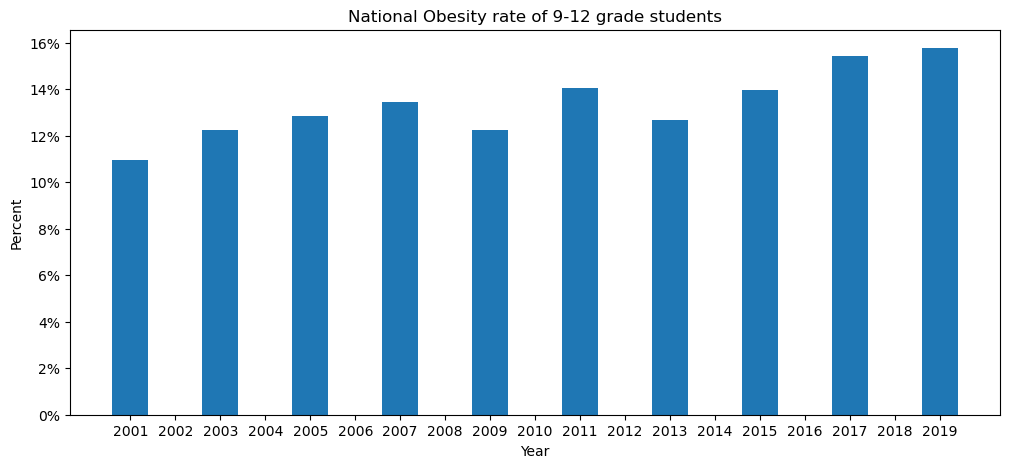

In [47]:
fig,ax = plt.subplots(1,1,figsize = (12,5))
ax.bar([int(i) for i in x.index],x.values)
ax.set_xticks(np.arange(2001,2020))
ax.set_yticklabels([str(i)+"%" for i in range(0,18,2)])
ax.set_title('National Obesity rate of 9-12 grade students')
ax.set_xlabel('Year')
ax.set_ylabel('Percent')
plt.show();

## Q：Percent of students in grades 9-12 who have an overweight classification

In [40]:
Q_ow = select_df_contain_content(obesity_data,'Question','Percent of students in grades 9-12 who have an overweight classification')

In [41]:
Q_ow = Q_ow.sort_values('YearStart',ascending = True)

In [45]:
national_ow = select_df_contain_content(Q_ow,'LocationDesc','National')

In [50]:
x = national_ow.groupby(['YearStart'])['Data_Value'].mean()

C:\Users\17925\AppData\Local\Temp\ipykernel_32420\934418107.py:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([str(i)+"%" for i in range(0,18,2)])


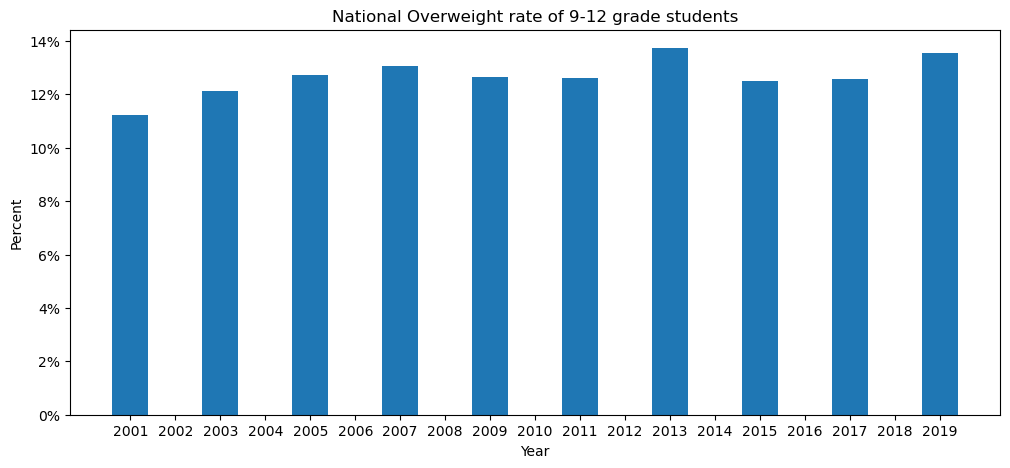

In [51]:
fig,ax = plt.subplots(1,1,figsize = (12,5))
ax.bar([int(i) for i in x.index],x.values)
ax.set_xticks(np.arange(2001,2020))
ax.set_yticklabels([str(i)+"%" for i in range(0,18,2)])
ax.set_title('National Overweight rate of 9-12 grade students')
ax.set_xlabel('Year')
ax.set_ylabel('Percent')
plt.show();